# 3-1 サポートベクターマシン回帰を触ろう（非線形回帰）
サポートベクターマシンの手法で回帰もできます。分類のときに出てきた超平面を回帰の関係式と考えます。

In [1]:
%matplotlib inline
%precision 3
import pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
# ボストン市の住宅価格データ
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X = X[['RM', 'LSTAT']]
y = boston.target
# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, random_state=0))

In [3]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
score1 = r2_score(y_test, y_pred)
score1

0.506

In [4]:
def scatter(y_pred, y):
    plt.gca().set_aspect('equal', adjustable='box')  # 縦横比を1
    plt.ylabel('y_test')
    plt.xlabel('y_pred')
    plt.plot([y.min(), y.max()], [y.min(), y.max()])  # 斜め45度の青い線
    plt.plot(y_pred, y, '.')

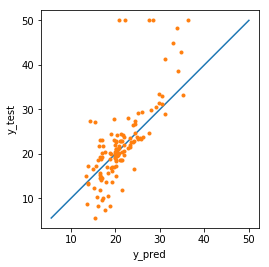

In [5]:
# 予測データ（y_pred）と真値（y_test）を描画
scatter(y_pred, y_test)

kernelオプションのデフォルトは、'rbf'（radial basis function kernel）です。データに対する事前情報がない場合によく用いられます。外れ値の影響も受けにくいです。

# グリッドサーチ
グリッドサーチでは、与えられたオプションの組合せを全て探索します。
sklearn.model_selection.GridSearchCVを使うと、各探索の中で、クロスバリデーションで評価します。

GridSearchCVでは、ベースになるモデルと、そのモデルのオプションを辞書で指定します。

>gscv = GridSearchCV(SVR(), {
 >   'C': [50, 60, 70, 80, 90],
  >  'gamma': [0.04, 0.05, 0.06, 0.07, 0.08]})

In [6]:
from sklearn.model_selection import GridSearchCV


gscv = GridSearchCV(SVR(), {
    'C':[50, 60 , 70, 80, 90],
    'gamma':[0.04, 0.05, 0.06, 0.07, 0.08]},
                    scoring ='r2')

gscv.fit(X_train, y_train)
y_pred = gscv.predict(X_test)
score2 = r2_score(y_test, y_pred)
score2

0.648

上記のモデルを使うと、gscv.fitで、下記のように探索し、最も良いモデルを選択します。選んだパラメーターは、gscv.best_params_で確認できます。

In [7]:
# 選択されたパラメーター
gscv.best_params_

{'C': 70, 'gamma': 0.060}

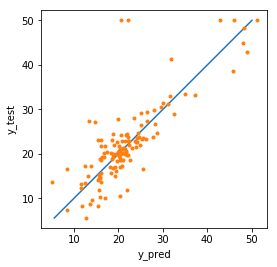

In [8]:
# 予測データ（y_pred）と真値（y_test）を描画
scatter(y_pred, y_test)

散布図で見てみると、線形回帰で難しかった高価格帯もかなりフィッティングするようになってきました。

# ランダムフォレスト回帰
ランダムフォレスト回帰は、複数の決定木を使うアンサンブル学習です。外れ値の影響を受けにくいです。

使い方は、他の回帰モデルと同じです。

まずは、random_state=0オプションだけで実行します。random_stateを指定しないと、実行ごとに結果が変わる可能性があります。

In [10]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state = 0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
score3 = r2_score(y_test, y_pred)
score3

0.667

続けて、グリッドサーチをします。
RandomForestRegressorで重要なオプションは、max_depthです。しかし、これだけだとデフォルト値を選ぶので、もう1つmin_samples_leafも指定します。

max_depth：枝分かれする木の深さ。大きすぎると過学習になります。
min_samples_leaf：葉の最小のデータ数。大きくするとラフなモデルになります。

In [11]:
# グリッドサーチで探索
gscv = GridSearchCV(RandomForestRegressor(), {
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'random_state': [0]},
    scoring='r2')
gscv.fit(X_train, y_train)
y_pred = gscv.predict(X_test)
score4 = r2_score(y_test, y_pred)
score4

0.695

In [12]:
gscv.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'random_state': 0}

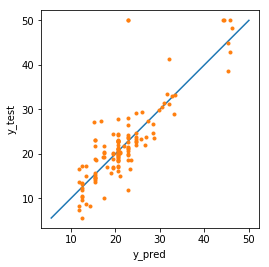

In [13]:
# 予測データ（y_pred）と真値（y_test）を描画
scatter(y_pred, y_test)